# Color Classification

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

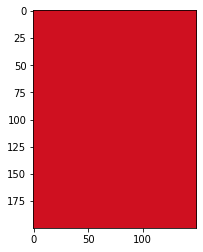

In [2]:
citra = cv2.cvtColor(cv2.imread('../input/color-dataset-for-color-recognition/training_dataset/red/red19.png'), cv2.COLOR_BGR2RGB)
plt.imshow(citra)

In [3]:
rgb = []
color = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        image = cv2.cvtColor(cv2.imread(os.path.join(dirname, filename)), cv2.COLOR_BGR2RGB)
        rgb.append(image[0][0])
        color.append(dirname[67:])

In [4]:
rgb_df = pd.DataFrame(np.array(rgb), columns=['red', 'green', 'blue'])
rgb_df.head()

,red,green,blue
0,254,103,0
1,255,103,0
2,235,97,35
3,255,153,0
4,255,160,0


In [5]:
color_df = pd.DataFrame(
    {
        'color': color
    }
)

color_df.head()

,color
0,orange
1,orange
2,orange
3,orange
4,orange


In [6]:
df = rgb_df.join(color_df)
df.head()

,red,green,blue,color
0,254,103,0,orange
1,255,103,0,orange
2,235,97,35,orange
3,255,153,0,orange
4,255,160,0,orange


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     250 non-null    uint8 
 1   green   250 non-null    uint8 
 2   blue    250 non-null    uint8 
 3   color   250 non-null    object
dtypes: object(1), uint8(3)
memory usage: 2.8+ KB


In [8]:
df['color'].nunique()

10

In [9]:
red = df['red']
green = df['green']
blue = df['blue']

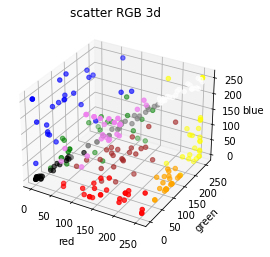

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(red, green, blue, c=df['color'])
ax.set(title='scatter RGB 3d',
      xlabel='red',
      ylabel='green',
      zlabel='blue')
plt.show()

In [11]:
X = df.iloc[:, 0:3]
y= df.iloc[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
k = 30
neighbors = []
accuracy = []

for i in range(k):
    knn = KNeighborsClassifier(n_neighbors=i+1, weights='distance', metric='euclidean')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    neighbors.append(i+1)
    accuracy.append(accuracy_score(y_test, y_pred))

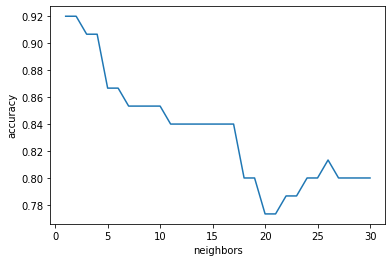

In [14]:
plt.plot(neighbors, accuracy)
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.show()

In [15]:
accuracy_df = pd.DataFrame(
    {
        'neighbors': neighbors,
        'accuracy': accuracy
    }
)

accuracy_df.head()

,neighbors,accuracy
0,1,0.920000
1,2,0.920000
2,3,0.906667
3,4,0.906667
4,5,0.866667


In [16]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
knn = knn.fit(X_train, y_train)

In [17]:
y_pred = knn.predict(X_test)

In [18]:
pd.DataFrame(
    {
        'y_actual': y_test,
        'y_predict': y_pred
    }
)

,y_actual,y_predict
225,brown,brown
122,blue,blue
92,black,black
157,green,green
154,green,black
...,...,...
240,brown,brown
210,violet,violet
170,green,green
16,orange,orange


In [19]:
accuracy_score(y_test, y_pred)

0.92